In [1]:
from preprocessing import *

/home/sam/anaconda3/envs/YOLOv5/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
from torchvision import transforms
import torchvision

In [3]:
cell_bbox = []
one_cell_indices = []

for i in range(len(boxes_list)):
    if len(boxes_list[i]) == 1:
        cell_bbox.append(boxes_list[i])
        one_cell_indices.append(i)

In [5]:
print(boxes_list[0])

tensor([[438.,   2., 471.,  35.]])


In [6]:
one_cell_images = []

j = 0

for i in range(len(images_path)):
    temp_path = int(images_path[i][12:-4])
    if temp_path == one_cell_indices[j]:
        one_cell_images.append(images[i])
        j += 1
        if j == len(one_cell_indices):
            break

In [7]:
def tensor_to_tuple(tensor):
    return tuple(tensor.tolist()[0])

In [8]:
print(len(cell_bbox), len(one_cell_images))

182 182


In [9]:
cropped_images = []

for i in range(len(one_cell_images)):
    cropped_images.append(Image.fromarray(one_cell_images[i]).crop(tuple(cell_bbox[i].tolist()[0])))
    #print() #.crop(cell_bbox[i].tolist())
    #print(cell_bbox[i].tolist(), i)

In [ ]:
#show_drawn_boxes(4)

##### List of sample single-cell images

In [10]:
cropped_images.insert(0, cropped_images[0])
cropped_images.insert(0, cropped_images[2])
cropped_images.insert(0, cropped_images[3])
cropped_images.insert(0, cropped_images[4])
cropped_images.insert(0, cropped_images[6])
cropped_images.insert(0, cropped_images[7])
cropped_images.insert(0, cropped_images[8])
cropped_images.insert(0, cropped_images[9])
cropped_images.insert(0, cropped_images[10])
cropped_images.insert(0, cropped_images[11])

In [11]:
for i in range(len(cropped_images) - 10):
    cropped_images.pop()

### Testing bounding box on one image

In [14]:
transform = transforms.Compose([
    transforms.PILToTensor()
])

In [26]:
bb_test_image = transform(cropped_images[0])
bb_test_box = np.array([[5, 10, 15, 20]])
bb_test_box = torch.Tensor(bb_test_box)

print(type(boxes_list[0]))
print(type(bb_test_box))
print(boxes_list[0])
print(bb_test_box)

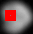

In [34]:
bb_test = draw_bounding_boxes(bb_test_image, bb_test_box, width=5, colors="red", fill="False")

bb_test = torchvision.transforms.ToPILImage()(bb_test)

bb_test.show()

In [ ]:
cell_bbox.insert(0, cell_bbox[0])
cell_bbox.insert(0, cell_bbox[2])
cell_bbox.insert(0, cell_bbox[3])
cell_bbox.insert(0, cell_bbox[4])
cell_bbox.insert(0, cell_bbox[6])
cell_bbox.insert(0, cell_bbox[7])
cell_bbox.insert(0, cell_bbox[8])
cell_bbox.insert(0, cell_bbox[9])
cell_bbox.insert(0, cell_bbox[10])
cell_bbox.insert(0, cell_bbox[11])

In [ ]:
t = cell_bbox[0]
t[0, 0]

In [ ]:
for i in range(len(cell_bbox)):
    for j in range(len(cell_bbox[i])):
        cell_bbox[i][0, j] = 

In [ ]:
for i in range(len(cell_bbox) - 10):
    cell_bbox.pop()

In [ ]:
import random

In [ ]:
for image in range(len(one_cell_images)):
    one_cell_images[image] = Image.fromarray(one_cell_images[image])
    one_cell_images[image].convert("RGB")

In [ ]:
threshold = 0.1

for i in range(len(cropped_images)):
    cropped_images[i] = np.array(cropped_images[i]) > 50

In [ ]:
def black_to_alpha(img):
    img = Image.fromarray(img)
    img = img.convert("RGBA")
    datas = img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)

    img.putdata(newData)
    
    return img

In [ ]:
for i in range(len(cropped_images)):
    cropped_images[i] = black_to_alpha(np.array(cropped_images[i]))

In [ ]:
generated_images = []
one_cell_bboxes = []

c = 0
for j in range(2000):
    test = torch.empty(0, 4)
    temp_bbox = torch.empty((35))
    test_image = Image.new('RGB', (696, 520), color=(0, 0, 0, 0))
    for i in range(random.randint(35, 50)):
        rand_image = random.randint(0, len(cropped_images) - 1)
        box = cell_bbox[rand_image]
        #box = boxes_list[one_cell_indices[rand_image]]
        #temp_bbox = torch.cat((temp_bbox, box))
        test = torch.cat((test, box))
        #one_cell_bboxes.append(boxes_list[one_cell_indices[rand_image]])
        #temp_background = Image.new('RGBA', (696, 520), color=(0, 0, 0, 0))
        randx = random.randint(0, 660)
        randy = random.randint(0, 480)
        #temp_background.paste(cropped_images[5], (randx, randy))
        test_image.paste(cropped_images[rand_image], (randx, randy), Image.fromarray(np.array(cropped_images[rand_image])[:,:,3]))

    #test_image.save("data/images/{number}.png".format(number=c), "PNG")
    generated_images.append(test_image) 
    one_cell_bboxes.append(test)
    c += 1
    #plt.imshow(test_image, cmap="gray")

In [ ]:
print(randx, randy)

In [ ]:
box[0,0] = randx
box[0, 1] = randy
box[0, 2] = randx + cell_bbox[0][0,2] - cell_bbox[0][0,0]
box[0, 3] = randy + cell_bbox[0][0, 1] - cell_bbox[0][0, 3]


In [ ]:
print(cell_bbox[0][0,3])

In [ ]:
cell_bbox[0][0, 3] - cell_bbox[0][0, 1]

In [ ]:
print(box)

In [ ]:
transform = transforms.Compose([
    transforms.PILToTensor()
])

In [ ]:
generated_images[-1].save("test.png", "PNG")

In [ ]:
ttt = read_image("test.png")
tt = draw_bounding_boxes(ttt, box, colors="red")
show(tt)

In [ ]:
print(box)

In [ ]:
cell_bbox[0][0,0] + cell_bbox[0][0,2]

In [ ]:
test_imag = cropped_images[0].convert("RGB")

In [ ]:
drawn_boxes = draw_bounding_boxes(transform(test_imag), cell_bbox[0])

In [ ]:
print(tensor_to_tuple(cell_bbox[0])[0])

In [ ]:
x = 0
y = 10
test_box = torch.tensor([x, y, x+10, y-5])
print(test_box)

In [ ]:
show(drawn_boxes)

In [ ]:
plt.imshow(generated_images[0])

In [ ]:
transform = transforms.Compose([
    transforms.PILToTensor()
])

In [ ]:
box = cell_bbox[0]
#box = [330, 190, 660, 355]
#box = torch.tensor(box)
#box = box.unsqueeze(0)
img = transform(Image.fromarray(cropped_images[0]).convert("L"))

img = draw_bounding_boxes(img, box, width=5, colors="red")

In [ ]:
img = transforms.ToPILImage()(img)

plt.imshow(img)

In [ ]:
print(one_cell_bboxes[1])

In [ ]:
print(one_cell_bboxes[0])

In [ ]:
convert_tensor = transforms.ToTensor()
testy = read_image("cell_images/0.png")
googa = draw_bounding_boxes(testy, boxes_list[1], colors="red")
show(googa)

In [ ]:
import torchvision.transforms as T

In [ ]:
transform = T.ToPILImage()

In [ ]:
imag = Image.open("data/images/train/0.png")
imag = imag.convert('RGB')
imag.save("imag.png", "PNG")

imag = read_image("imag.png")
drawn_boxes = draw_bounding_boxes(imag, one_cell_bboxes[0], colors="red")
show(drawn_boxes)

In [ ]:
for i in range(len(generated_images)):
    generated_images[i].convert("L")
    generated_images[i].save("temp2/{number}.png".format(number=i), "PNG")


In [ ]:
print(np.array(generated_images[0]).shape)

In [ ]:
show_drawn_boxes(0)

In [ ]:
#generated_images[0] = np.array(generated_images[0])
#generated_images[0] = generated_images[0][:][:3]
#print(np.array(generated_images[0]).shape)

In [ ]:
#generated_images[0].convert("RGB")
#generated_images[0].save("imag.png", "PNG")
#imag = read_image("imag.png")
#drawn_boxes = draw_bounding_boxes(imag, one_cell_bboxes, colors="red")
#show(drawn_boxes)

In [ ]:
#for box in range(len(one_cell_bboxes)):
#    one_cell_bboxes[box] = normalize(one_cell_bboxes[box], p=1.0, dim=1)

In [ ]:
write_box_info_to_file(one_cell_bboxes)